In [ ]:
import xarray as xr
import matplotlib.pyplot as plt


import numpy as np
import cartopy.crs as ccrs
import cartopy

go = 9.8196 #(m/s**2) 
Rd = 287.04 # specific gas constant for dry air
R_universal = 8.314472
Na = 6.0221415e23



In [ ]:
fpath = "/net/fluo/data2/groupMembers/cchristo/reanalysis_3d/merra2_averages/seas_means_renamed.nc"

In [ ]:
ds = xr.open_dataset(fpath)

In [ ]:
ds['sigma'] = ds['PL']/ds['PS']
ds['dz'] = (ds['DELP']/ds['PL'])*(Rd*ds['T']*(1+0.608*ds['QV']))/go
# dz = np.divide(ds['DELP'].values,ds['PL'].values)*(Rd*T_local*(1+0.608*q_local))/go

In [126]:
# ds_lower = ds.where(ds['PL'])
ds_lower = ds.where(ds['sigma'] > 0.85)

# ds_lev.where(ds_lev > 70000).plot(vmax = 100000)

In [154]:
# ds_lower

In [55]:
ds_lower_diff = ds_lower['T'].sel(season = 'JJA').mean(dim = 'lev') - \
        ds_lower['T'].sel(season = 'DJF').mean(dim = 'lev')
ds_lower_diff_abs = abs(ds_lower_diff)

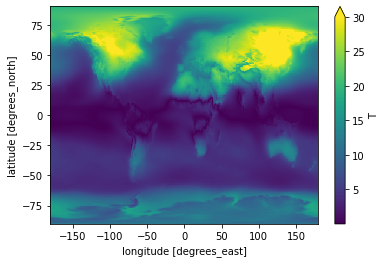

In [54]:
abs(ds_lower_diff).plot(vmax = 30)


In [107]:
ds_lower_lapse_diff = ds_lower['T'].sel(season = 'JJA').diff(dim = 'lev').mean(dim = 'lev') - \
        ds_lower['T'].sel(season = 'DJF').diff(dim = 'lev').mean(dim = 'lev')

ds_lower_lapse_diff_abs = abs(ds_lower_lapse_diff)

In [143]:
# ds_lower_lapse_diff_abs.plot()
lapse_summer = ((ds_lower['T'].sel(season = 'JJA').diff(dim = 'lev'))/(ds_lower['dz'].sel(season = 'JJA'))).mean(dim = 'lev')

lapse_winter = ((ds_lower['T'].sel(season = 'DJF').diff(dim = 'lev'))/(ds_lower['dz'].sel(season = 'DJF'))).mean(dim = 'lev')

lapse_seas_diff = abs(lapse_summer - lapse_winter)*1000

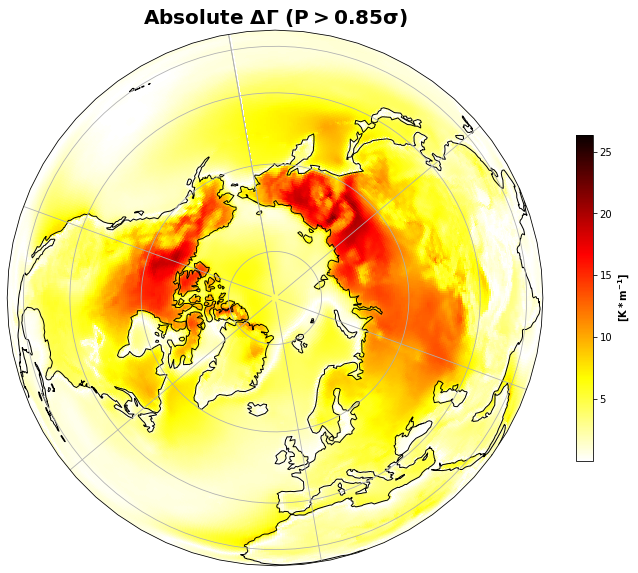

In [152]:
fig = plt.figure(figsize=(12, 12))
crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
# ax = plt.axes(projection=ccrs.Orthographic(-10, 90))
ax = plt.axes(projection=ccrs.Orthographic(-10, 90))

    
dat = ax.pcolormesh(ds_lower_diff_abs.lon.values, ds_lower_diff_abs.lat.values,
              lapse_seas_diff.values, 
              transform=ccrs.PlateCarree(), 
              cmap = plt.get_cmap('hot_r'))


# ax.add_feature(cartopy.feature.OCEAN, zorder=0)
# ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.coastlines()

fig.colorbar(dat, shrink=0.5, label = r'$\bf{[K*m^{-1}]}$')
ax.set_global()
ax.gridlines()
plt.title(r'Absolute $\bf{\Delta \Gamma}$ ($\bf{P > 0.85 \sigma}$)', weight = 'bold', fontsize = 20)
plt.show()
